In [32]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import math

Choose an ETF with a minimum of 100 assets and get historical data

In [97]:
import yfinance as yf
import datetime as dt 

ticker = 'SPY'
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(365*5)
historical_data = yf.download(ticker, start=start_date, end=end_date)
print(historical_data.head())

[*********************100%***********************]  1 of 1 completed

Ticker                          AAPL       AMZN      GOOGL         JNJ  \
Date                                                                     
2019-12-24 00:00:00+00:00  68.898697  89.460503  66.978691  127.029366   
2019-12-26 00:00:00+00:00  70.265671  93.438499  67.877434  126.942307   
2019-12-27 00:00:00+00:00  70.238991  93.489998  67.487350  126.872673   
2019-12-30 00:00:00+00:00  70.655876  92.344498  66.743546  126.480972   
2019-12-31 00:00:00+00:00  71.172134  92.391998  66.727608  126.977158   

Ticker                           META        MSFT      NVDA          PG  \
Date                                                                      
2019-12-24 00:00:00+00:00  204.339432  150.833038  5.940596  110.680832   
2019-12-26 00:00:00+00:00  206.999252  152.069336  5.954786  110.680832   
2019-12-27 00:00:00+00:00  207.308105  152.347290  5.897027  111.449821   
2019-12-30 00:00:00+00:00  203.632141  151.034256  5.783753  110.017899   
2019-12-31 00:00:00+00:00  204.

Calculate momentum

In [184]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'TSLA', 'META', 'JNJ', 'PG', 'UNH']
momentum = historical_data.pct_change(periods=30)
print(momentum_30.tail())


Ticker                         AAPL      AMZN     GOOGL       JNJ      META  \
Date                                                                          
2024-12-17 00:00:00+00:00  0.143007  0.180662  0.156015 -0.067336  0.105693   
2024-12-18 00:00:00+00:00  0.111313  0.105363  0.111205 -0.078551  0.044096   
2024-12-19 00:00:00+00:00  0.122777  0.078227  0.069209 -0.083278  0.041955   
2024-12-20 00:00:00+00:00  0.119967  0.070793  0.060190 -0.070828 -0.010103   
2024-12-23 00:00:00+00:00  0.124736  0.081084  0.092532 -0.058110  0.018654   

Ticker                         MSFT      NVDA        PG      TSLA       UNH  \
Date                                                                          
2024-12-17 00:00:00+00:00  0.112618 -0.041536  0.031803  0.976034 -0.126195   
2024-12-18 00:00:00+00:00  0.063020 -0.078558  0.020029  0.750437 -0.115326   
2024-12-19 00:00:00+00:00  0.040102 -0.102472  0.050543  0.511697 -0.176915   
2024-12-20 00:00:00+00:00  0.026256 -0.095182  0.02

Calculate z_factor score

In [191]:
momentum_mean = momentum.rolling(window=30).mean()
momentum_std = momentum.rolling(window=30).std()
z_scores = (momentum - momentum_mean) / momentum_std

z_scores= z_scores.iloc[-30:]

print("Z-scores for (30-day window):")
print(z_scores_last_month)

Z-scores for (30-day window):
Ticker                         AAPL      AMZN     GOOGL       JNJ      META  \
Date                                                                          
2024-11-11 00:00:00+00:00 -1.585369  1.682570  1.025586 -1.570394 -1.444689   
2024-11-12 00:00:00+00:00 -0.727699  1.960022  0.964187 -2.345889 -1.424867   
2024-11-13 00:00:00+00:00 -0.675949  2.364281  0.680305 -1.736632 -1.365492   
2024-11-14 00:00:00+00:00 -0.152637  2.166748  0.113004 -1.881345 -1.633260   
2024-11-15 00:00:00+00:00 -0.691206  0.514984 -0.608217 -0.880648 -2.345780   
2024-11-18 00:00:00+00:00  0.320247  1.066029  0.516898 -0.242578 -1.851658   
2024-11-19 00:00:00+00:00 -0.215214  1.081519  0.702960 -0.977386 -1.716672   
2024-11-20 00:00:00+00:00 -0.606728  0.556026  0.785454 -1.214710 -1.439442   
2024-11-21 00:00:00+00:00 -0.588898 -0.104525 -1.168059 -0.190338 -1.251406   
2024-11-22 00:00:00+00:00 -0.244068 -0.462701 -2.089577 -0.640074 -1.386561   
2024-11-25 00:00:00+00

Identify long and short baskets

In [192]:
z_scores = (momentum - momentum_mean) / momentum_std
long_basket = z_scores[z_scores > 1].index.tolist() 
short_basket = z_scores[z_scores < -1].index.tolist() 



Charts

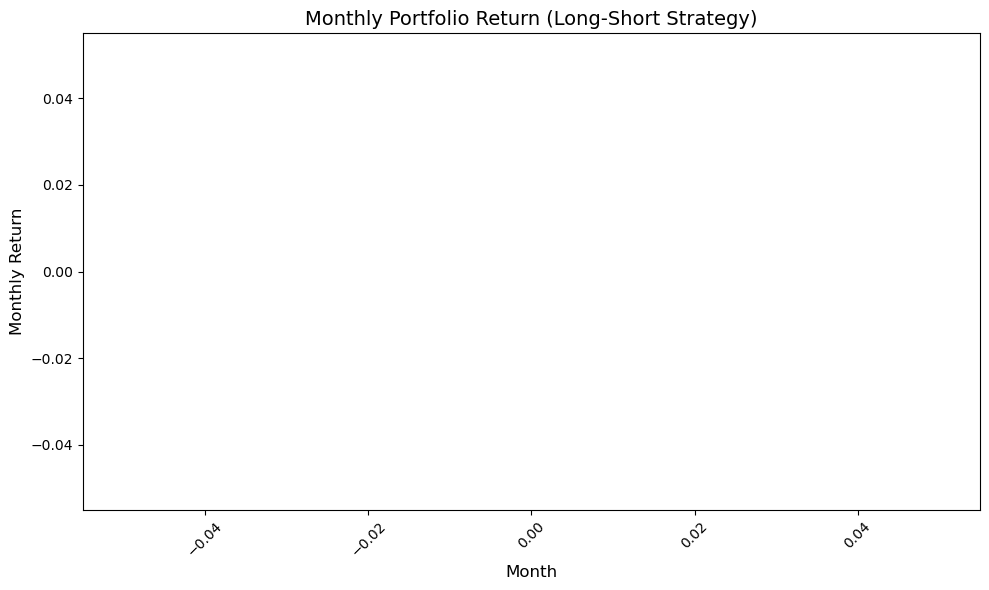

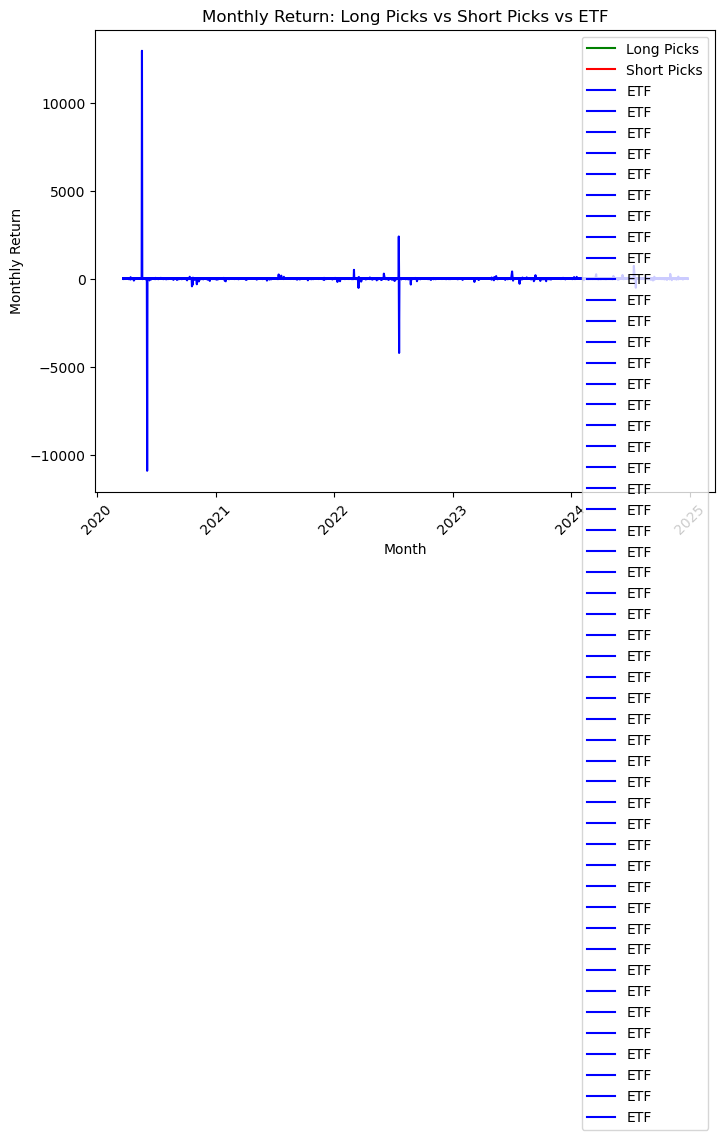

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/var/folders/qs/c8khbpsj6mz0700tf80pw_hr0000gn/T/ipykernel_81265/819579907.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


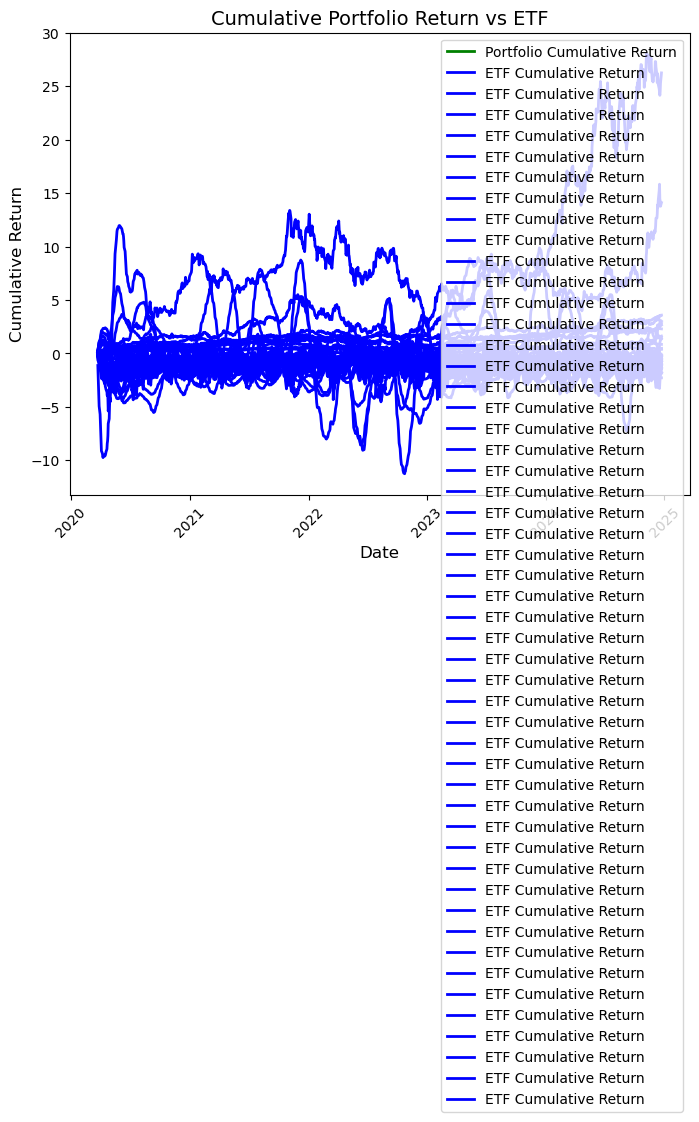

In [220]:
etf_returns = historical_data.pct_change().dropna()
monthly_portfolio_returns = pd.DataFrame(index=historical_data.index)
monthly_portfolio_returns.loc[historical_data.index, 'returns'] = long_returns - short_returns



colors = ['green' if x >= 0 else 'red' for x in monthly_portfolio_returns.values]
plt.figure(figsize=(10, 6))
plt.bar(monthly_returns, monthly_returns, color=['green' if x > 0 else 'red' for x in monthly_returns])
plt.title('Monthly Portfolio Return (Long-Short Strategy)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Monthly Return', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(long_returns.index, long_returns, label='Long Picks', color='green')
plt.plot(short_returns.index, short_returns, label='Short Picks', color='red')
plt.plot(etf_returns.index, etf_returns, label='ETF', color='blue')
plt.title('Monthly Return: Long Picks vs Short Picks vs ETF')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.legend()
plt.xticks(rotation=45)
plt.show()

portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
etf_cumulative_returns = (1 + etf_returns).cumprod() - 1

plt.figure(figsize=(8, 6))
plt.plot(portfolio_cumulative_returns, label='Portfolio Cumulative Return', color='green', linewidth=2)
plt.plot(etf_cumulative_returns, label='ETF Cumulative Return', color='blue', linewidth=2)
plt.title('Cumulative Portfolio Return vs ETF', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




     